## 2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [139]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
import pandas as pd

### Α. Μελέτη πραγματικών τοπολογιών
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

#### Παραγωγή συνθετικών τοπολογιών
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

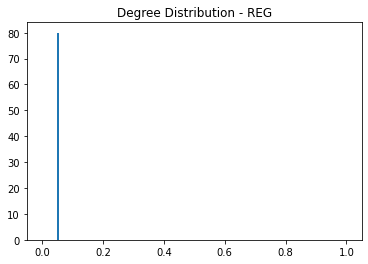

This graph is connected: True
Mean Node Degree for REG(Normalized): 0.05063291139240507
Mean Node Degree for REG: 4.0
Variance of Node Degree for REG(Normalized): 4.81482486096809e-35
Variance of Node Degree for REG: 0.0


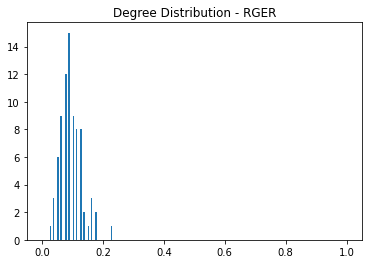

This graph is connected: True
Mean Node Degree for RGER(Normalized): 0.09493670886075949
Mean Node Degree for RGER: 7.5
Variance of Node Degree for RGER(Normalized): 0.001305880467873738
Variance of Node Degree for RGER: 8.15


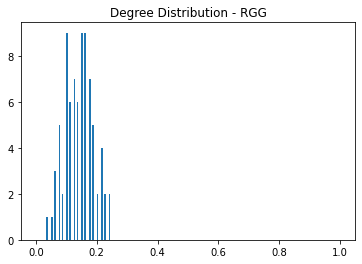

This graph is connected: True
Mean Node Degree for RGG(Normalized): 0.14240506329113925
Mean Node Degree for RGG: 11.25
Variance of Node Degree for RGG(Normalized): 0.002189152379426374
Variance of Node Degree for RGG: 13.6625


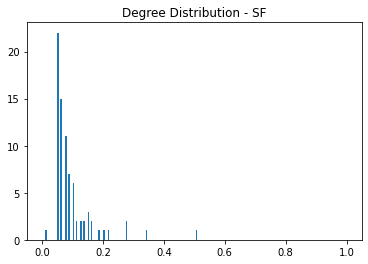

This graph is connected: True
Mean Node Degree for SF(Normalized): 0.09620253164556963
Mean Node Degree for SF: 7.6
Variance of Node Degree for SF(Normalized): 0.005350104149975965
Variance of Node Degree for SF: 33.39


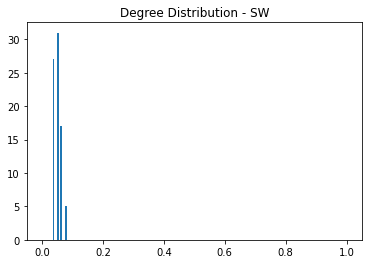

This graph is connected: True
Mean Node Degree for SW(Normalized): 0.05063291139240507
Mean Node Degree for SW: 4.0
Variance of Node Degree for SW(Normalized): 0.00012818458580355713
Variance of Node Degree for SW: 0.8


In [140]:
# values to create Graphs
n = 80
d = 4
M = 300
R = 0.25
p = 0.3
k = 4
seedno = 5
random.seed(seedno)

# function that returns the degree list (normalized)
def find_degree(G):
    return dict(nx.degree_centrality(G))

def degreeInfo(G, _title, _bins):
    # get degree list
    degree = find_degree(G)
    # create the figure, add title, show plot
    plt.figure()
    plt.title("Degree Distribution - " + _title)
    plt.hist(list(degree.values()), range = (0, 1), bins = _bins)
    plt.show()
    # print if graph is connected or not, mean node degree (normalized and not), variance of node degree (normalized and not)
    print("This graph is connected:", nx.is_connected(G))
    print("Mean Node Degree for " + _title + "(Normalized):", np.mean(np.array(list(degree.values()))))
    print("Mean Node Degree for " + _title + ":", np.mean(np.array(list(dict(nx.degree(G)).values()))))
    print("Variance of Node Degree for " + _title + "(Normalized):", np.var(np.array(list(dict(degree).values()))))
    print("Variance of Node Degree for " + _title + ":", np.var(np.array(list(dict(nx.degree(G)).values()))))

# create all graphs and call degreeInfo
REG = nx.watts_strogatz_graph(n, d, 0, seedno)
degreeInfo(REG, "REG" , 200)
RGER = nx.gnm_random_graph(n, M, seedno)
degreeInfo(RGER, "RGER" , 200)
RGG = nx.random_geometric_graph(n, R, seed = seedno)
degreeInfo(RGG, "RGG" , 200)
SF = nx.barabasi_albert_graph(n, d, seedno)
degreeInfo(SF, "SF" , 200)
SW = nx.watts_strogatz_graph(n, d, p, seedno)
degreeInfo(SW, "SW" , 200)

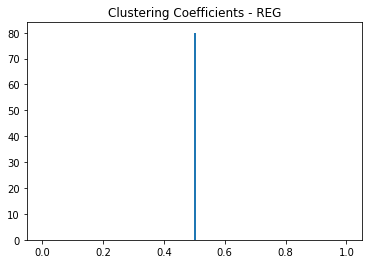

Avg Clustering Coefficient for REG(Normalized): 0.5
Var of Clustering Coefficients for REG(Normalized): 0.0


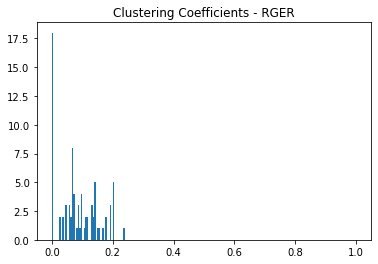

Avg Clustering Coefficient for RGER(Normalized): 0.08497775916893564
Var of Clustering Coefficients for RGER(Normalized): 0.004288874899085844


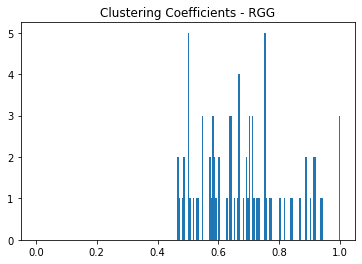

Avg Clustering Coefficient for RGG(Normalized): 0.6825788363897884
Var of Clustering Coefficients for RGG(Normalized): 0.020650408506201083


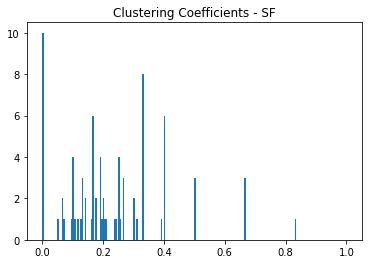

Avg Clustering Coefficient for SF(Normalized): 0.22922761606585143
Var of Clustering Coefficients for SF(Normalized): 0.02892890777065041


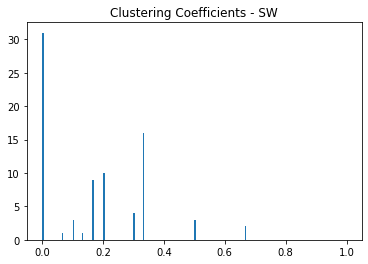

Avg Clustering Coefficient for SW(Normalized): 0.16708333333333333
Var of Clustering Coefficients for SW(Normalized): 0.028069270833333326


In [141]:
# returns clustering coefficient of G and avg clustering coefficient of G
def cc_and_avgcc(G):
    return (nx.clustering(G), nx.average_clustering(G))

def ccInfo(G, _title, _bins):
    # get cc and avgcc for G
    (Gcc, Gavgcc) = cc_and_avgcc(G)
    # create the figure, add title, show plot
    plt.figure()
    plt.title("Clustering Coefficients - " + _title)
    plt.hist(list(Gcc.values()), range = (0, 1), bins = _bins)
    plt.show()
    # Convert Gcc dictionary to array (for std)
    Gcc_arr = np.array(list(Gcc.values()))
    # Print avg cc
    print("Avg Clustering Coefficient for " + _title + "(Normalized):", Gavgcc)
    # Print var
    print("Var of Clustering Coefficients for " + _title + "(Normalized):", np.var(Gcc_arr))

ccInfo(REG, "REG" , 200)
ccInfo(RGER, "RGER" , 200)
ccInfo(RGG, "RGG" , 200)
ccInfo(SF, "SF" , 200)
ccInfo(SW, "SW" , 200)

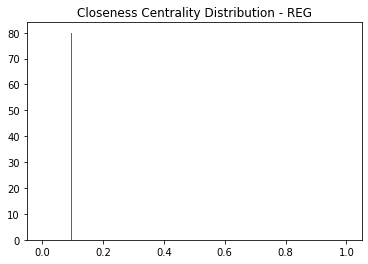

Mean Closeness Centrality for REG(Normalized): 0.09634146341463413
Variance of Closeness Centrality for REG(Normalized): 1.925929944387236e-34


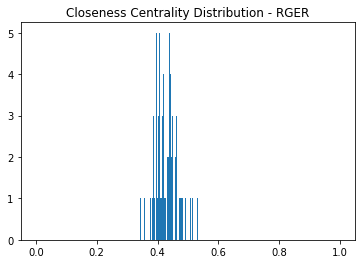

Mean Closeness Centrality for RGER(Normalized): 0.4242297800918761
Variance of Closeness Centrality for RGER(Normalized): 0.0013672367843356472


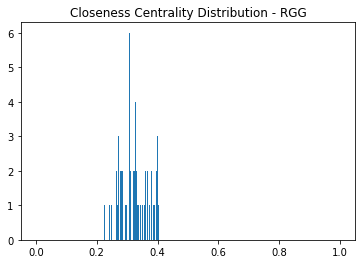

Mean Closeness Centrality for RGG(Normalized): 0.320088016052558
Variance of Closeness Centrality for RGG(Normalized): 0.0023529156049271896


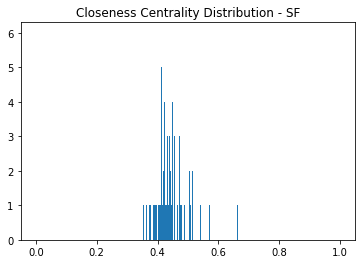

Mean Closeness Centrality for SF(Normalized): 0.4464453837879834
Variance of Closeness Centrality for SF(Normalized): 0.00274403344255402


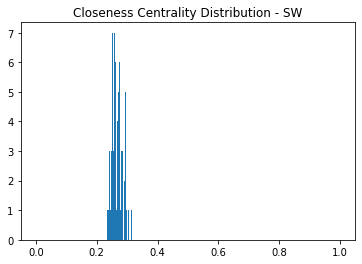

Mean Closeness Centrality for SW(Normalized): 0.26914269896354603
Variance of Closeness Centrality for SW(Normalized): 0.0003201178985869596


In [142]:
def find_closeness(G):
    return nx.closeness_centrality(G)

def closenessInfo(G, _title, _bins):
    # get closeness for G
    closeness = find_closeness(G)
    # create the figure, add title, show plot
    plt.figure()
    plt.title("Closeness Centrality Distribution - " + _title)
    plt.hist(list(closeness.values()), range = (0, 1), bins = _bins)
    plt.show()
    print("Mean Closeness Centrality for " + _title + "(Normalized):", np.mean(np.array(list(closeness.values()))))
    print("Variance of Closeness Centrality for " + _title + "(Normalized):", np.var(np.array(list(closeness.values()))))

closenessInfo(REG, "REG" , 400)
closenessInfo(RGER, "RGER" , 400)
closenessInfo(RGG, "RGG" , 400)
closenessInfo(SF, "SF" , 400)
closenessInfo(SW, "SW" , 400)    

#### Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών

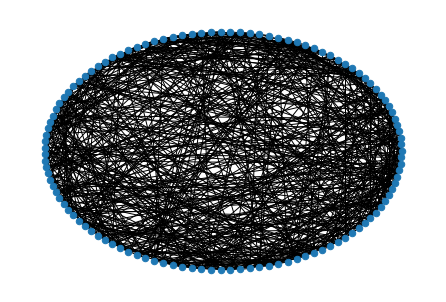

In [143]:
#football network
football = nx.read_gml(r"football.gml")

nx.draw_circular(football, node_size = 42)

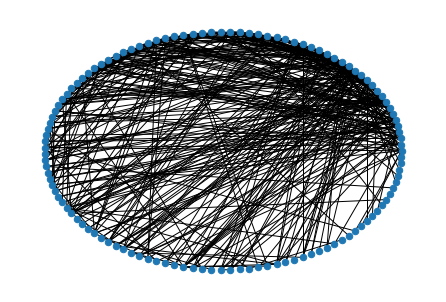

In [144]:
#Game of thrones network
import csv
got = nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0], row[1])
        line_count += 1

nx.draw_circular(got, node_size = 42)

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

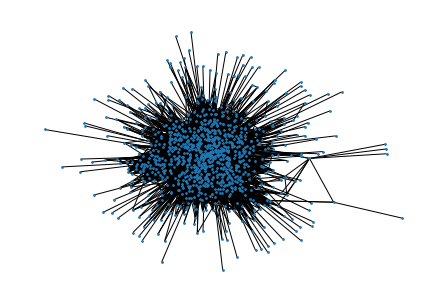

In [145]:
#email-Eu-core network
eu = nx.read_edgelist("email-Eu-core.txt", create_using = nx.Graph())
# remove self loops using remove_edges_from
eu.remove_edges_from(nx.selfloop_edges(eu))
# largest connected component
largest_eu = max(nx.connected_components(eu), key = len)
# eu subgraph
eu_subgraph = eu.subgraph(largest_eu)
# visualize
nx.draw(eu.subgraph(largest_eu), node_size = 3)

#### Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες

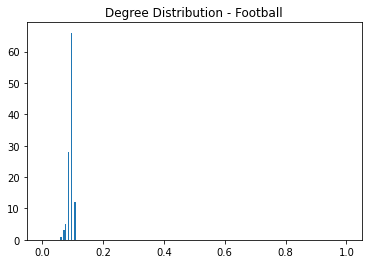

This graph is connected: True
Mean Node Degree for Football(Normalized): 0.0935163996948894
Mean Node Degree for Football: 10.660869565217391
Variance of Node Degree for Football(Normalized): 6.0067922600584965e-05
Variance of Node Degree for Football: 0.7806427221172025


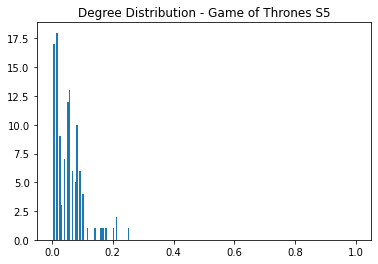

This graph is connected: True
Mean Node Degree for Game of Thrones S5(Normalized): 0.05640222190571145
Mean Node Degree for Game of Thrones S5: 6.65546218487395
Variance of Node Degree for Game of Thrones S5(Normalized): 0.002229916756739365
Variance of Node Degree for Game of Thrones S5: 31.049360920838932


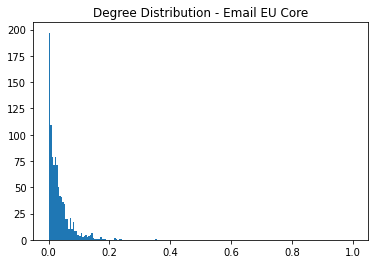

This graph is connected: True
Mean Node Degree for Email EU Core(Normalized): 0.033080384262929745
Mean Node Degree for Email EU Core: 32.5841784989858
Variance of Node Degree for Email EU Core(Normalized): 0.001412958792451516
Variance of Node Degree for Email EU Core: 1370.887944406272


In [146]:
degreeInfo(football, "Football", 200)
degreeInfo(got, "Game of Thrones S5", 200)
degreeInfo(eu_subgraph, "Email EU Core", 200)

#### Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες

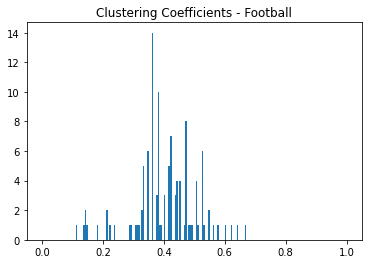

Avg Clustering Coefficient for Football(Normalized): 0.40321601104209814
Var of Clustering Coefficients for Football(Normalized): 0.010767498242611785


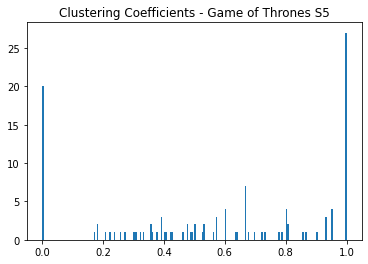

Avg Clustering Coefficient for Game of Thrones S5(Normalized): 0.5744036387164706
Var of Clustering Coefficients for Game of Thrones S5(Normalized): 0.12611105959324512


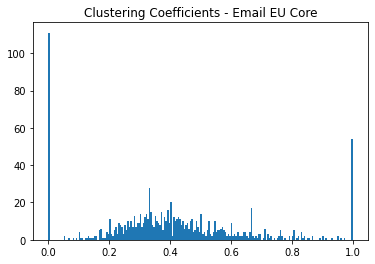

Avg Clustering Coefficient for Email EU Core(Normalized): 0.40705044751953817
Var of Clustering Coefficients for Email EU Core(Normalized): 0.06137235066322143


In [147]:
ccInfo(football, "Football", 200)
ccInfo(got, "Game of Thrones S5", 200)
ccInfo(eu_subgraph, "Email EU Core", 200)

#### Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες

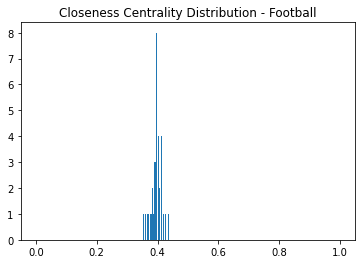

Mean Closeness Centrality for Football(Normalized): 0.39931907825186225
Variance of Closeness Centrality for Football(Normalized): 0.0002461653416156402


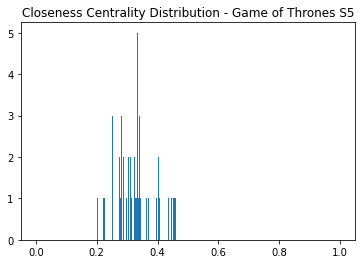

Mean Closeness Centrality for Game of Thrones S5(Normalized): 0.31905170483140755
Variance of Closeness Centrality for Game of Thrones S5(Normalized): 0.002653087706092289


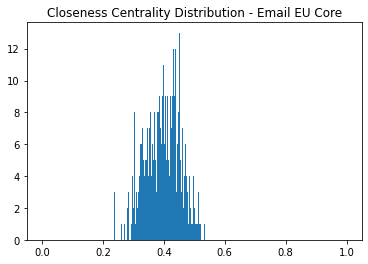

Mean Closeness Centrality for Email EU Core(Normalized): 0.39446404120869627
Variance of Closeness Centrality for Email EU Core(Normalized): 0.002987721202507139


In [148]:
closenessInfo(football, "Football", 800)
closenessInfo(got, "Game of Thrones S5", 800)
closenessInfo(eu_subgraph, "Email EU Core", 800)

#### Παρατηρήσεις

##### Football
> Ο συγκεκριμένος γράφος φαίνεται να είναι πιο κοντά σε RGER, ωστόσο κάποια απο τα χαρακτηριστικά που εμφανίζει τον κάνουν να φαίνεται επίσης σαν Small World. Πιο συγκεκριμένα, ο λόγος που φαίνεται πιο πολύ σαν RGER είναι λόγω της οπτικοποίησης της τοπολογίας αλλά επίσης και από το degree centrality και το closeness centrality της συγκεκριμένης τοπολογίας, που οι τιμές φαίνεται να είναι πολύ κοντινές με τις τιμές του degree centrality και του closeness centrality του συνθετικού γράφου RGER που παράχθηκε σε αυτή την εργασία. Το χαρακτηριστικό που φέρνει την παρούσα τοπολογία να μοιάζει με SW είναι το clustering coefficient που έχει πιο κοντινές τιμές με τον συνθετικό γράφο SW που παρήχθη στην εργασία.

##### Game Of Thrones
> Ο συγκεκριμένος γράφος είναι αναμφίβολα RGG. Αυτό μπορούμε να το συμπεράνουμε αρχικά απο την οπτικοποίηση της τοπολογίας, που έχει ακριβώς την ίδια μορφή με τον συνθετικό γράφο RGG, που παρήχθη στην πρώτη εργαστηριακή άσκηση. Επιπλέον, τόσο το degree centrality, το closeness centrality αλλά και το clustering coefficient μοιάζουν πάρα πολύ με τις τιμές του συνθετικού γράφου RGG, που παρήχθη στην συγκεκριμένη εργασία. 

##### EU
> Η τοπολογία αυτή φαίνεται να είναι πιο κοντά σε Scale Free. Αυτό το συμπεραίνουμε απο το ότι τόσο το degree centrality όσο και το closeness centrality είναι αρκετά κοντά στις τιμές του συνθετικού γράφου SF. Επιπλέον, πέραν των τιμών και οι γραφικές συμβαδίζουν με αυτές του συνθετικού γράφου SF. Κατά τα άλλα, η μόνη τιμή που δεν συμβαδίζει τόσο πολύ με τον συνθετικό γράφο SF σε αυτή την τοπολογία είναι το clustering coefficient.

### B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

#### Όλοι οι γράφοι σε μια λίστα

In [149]:
graphs = [
    ("REG", REG, "modularity"),
    ("REG", REG, "performance"),
    ("RGER", RGER, "modularity"),
    ("RGER", RGER, "performance"),
    ("RGG", RGG, "modularity"),
    ("RGG", RGG, "performance"),
    ("SF", SF, "modularity"),
    ("SF", SF, "performance"),
    ("SW", SW, "modularity"),
    ("SW", SW, "performance"),
    ("football", football, "modularity"),
    ("football", football, "performance"),
    ("got", got, "modularity"),
    ("got", got, "performance"),
    ("eu", eu_subgraph, "modularity"),
    ("eu", eu_subgraph, "performance")
]

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [150]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G, first_label = start_value)
    G_mapping = dict(enumerate(G.nodes, 0))
    return nG, G_mapping

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [151]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())
colors.remove("black")
colors.remove("b")
colors.remove("darkgray")
colors.remove('m')
colors.remove('k')
colors.remove("darkgrey")

#### Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [152]:
import itertools
from tqdm import tqdm
k = 50

# lists to keep best performance and modularity scores
performanceList = []
modularityList = []

bestCommsNG = {}

def findClusters_NG(G, Gname, metric):
    bestModularity = -1
    bestPerformance = 0

    comp = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) < k, comp)

    for communities in limited:
        if metric == "modularity":
            modularity = nx.algorithms.community.quality.modularity(G, communities)
            if modularity > bestModularity:
                bestModularity = modularity
                bestComm = communities
        else:
            performance = nx.algorithms.community.quality.partition_quality(G, communities)[1]
            if performance > bestPerformance:
                bestPerformance = performance
                bestComm = communities
    
    bestCommsNG[Gname + " " + metric] = [list(item) for item in bestComm]

    if metric == "modularity":
        modularityList.append(bestModularity)
        print("Best modularity score for " + Gname + " with Newman Girvan algorithm:", bestModularity)
    else:
        performanceList.append(bestPerformance)
        print("Best performance score for " + Gname + " with Newman Girvan algorithm:", bestPerformance)

In [153]:
for (name, g, metric) in tqdm(graphs):
    findClusters_NG(g, name, metric)

  6%|▋         | 1/16 [00:00<00:06,  2.34it/s]

Best modularity score for REG with Newman Girvan algorithm: 0.7249999999999999


 12%|█▎        | 2/16 [00:00<00:06,  2.31it/s]

Best performance score for REG with Newman Girvan algorithm: 0.9696202531645569


 19%|█▉        | 3/16 [00:03<00:19,  1.46s/it]

Best modularity score for RGER with Newman Girvan algorithm: 0.21109444444444445


 25%|██▌       | 4/16 [00:06<00:23,  1.96s/it]

Best performance score for RGER with Newman Girvan algorithm: 0.9215189873417722


 31%|███▏      | 5/16 [00:08<00:21,  1.98s/it]

Best modularity score for RGG with Newman Girvan algorithm: 0.5970493827160495


 38%|███▊      | 6/16 [00:10<00:20,  2.01s/it]

Best performance score for RGG with Newman Girvan algorithm: 0.9291139240506329


 44%|████▍     | 7/16 [00:12<00:19,  2.21s/it]

Best modularity score for SF with Newman Girvan algorithm: 0.13638331024930742


 50%|█████     | 8/16 [00:15<00:19,  2.39s/it]

Best performance score for SF with Newman Girvan algorithm: 0.9174050632911392


 56%|█████▋    | 9/16 [00:16<00:12,  1.85s/it]

Best modularity score for SW with Newman Girvan algorithm: 0.5741015625


 62%|██████▎   | 10/16 [00:17<00:08,  1.48s/it]

Best performance score for SW with Newman Girvan algorithm: 0.9670886075949368


 69%|██████▉   | 11/16 [00:23<00:15,  3.09s/it]

Best modularity score for football with Newman Girvan algorithm: 0.5996290274077957


 75%|███████▌  | 12/16 [00:30<00:16,  4.24s/it]

Best performance score for football with Newman Girvan algorithm: 0.9581998474446987


 81%|████████▏ | 13/16 [00:33<00:11,  3.79s/it]

Best modularity score for got with Newman Girvan algorithm: 0.6681205999387817


 88%|████████▊ | 14/16 [00:36<00:06,  3.48s/it]

Best performance score for got with Newman Girvan algorithm: 0.9641076769690927


 94%|█████████▍| 15/16 [12:49<03:43, 223.60s/it]

Best modularity score for eu with Newman Girvan algorithm: 0.0006218821799455388


100%|██████████| 16/16 [24:26<00:00, 91.68s/it] 

Best performance score for eu with Newman Girvan algorithm: 0.13749034709280175


#### Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
> Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters =  $[2,...,50] $. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.

In [154]:
bestCommsSC = {}

def findClusters_SC(G, Gname, metric):
    # variables to keep modularity, performance
    bestModularity = -1
    bestPerformance = 0
    nodes = list(G.nodes())
    adjacencyMatrix = nx.to_numpy_array(G)
    for i in range(1, k):
        comm = dict()
        sc = SpectralClustering(n_clusters = i, affinity = "precomputed").fit(adjacencyMatrix)
        for x in np.unique(sc.labels_):
            comm[x] = list()
        for x in range(len(sc.labels_)):
            comm[sc.labels_[x]].append(nodes[x])
        
        if metric == "modularity":
            modularity = nx.algorithms.community.quality.modularity(G, list(comm.values()))
            if (modularity > bestModularity):
                bestModularity = modularity
                bestComm = comm
        else:
            performance = nx.algorithms.community.quality.partition_quality(G, list(comm.values()))[1]
            if (performance > bestPerformance):
                bestPerformance = performance
                bestComm = comm

    bestCommsSC[Gname + " " + metric] = list(bestComm.values())

    if metric == "modularity":
        modularityList.append(bestModularity)
        print("Best modularity score for " + Gname + " with Spectral Clustering algorithm:", bestModularity)
    else:
        performanceList.append(bestPerformance)
        print("Best performance score for " + Gname + " with Spectral Clustering algorithm:", bestPerformance)

In [155]:
for (name, g, metric) in tqdm(graphs):
    findClusters_SC(g, name, metric)

  6%|▋         | 1/16 [00:06<01:44,  6.97s/it]

Best modularity score for REG with Spectral Clustering algorithm: 0.7253125


 12%|█▎        | 2/16 [00:13<01:35,  6.82s/it]

Best performance score for REG with Spectral Clustering algorithm: 0.9743670886075949


 19%|█▉        | 3/16 [00:20<01:26,  6.67s/it]

Best modularity score for RGER with Spectral Clustering algorithm: 0.28296666666666664


 25%|██▌       | 4/16 [00:26<01:17,  6.49s/it]

Best performance score for RGER with Spectral Clustering algorithm: 0.9164556962025316


 31%|███▏      | 5/16 [00:32<01:09,  6.36s/it]

Best modularity score for RGG with Spectral Clustering algorithm: 0.6021827160493828


 38%|███▊      | 6/16 [00:39<01:04,  6.44s/it]

Best performance score for RGG with Spectral Clustering algorithm: 0.9363924050632911


 44%|████▍     | 7/16 [00:45<00:59,  6.56s/it]

Best modularity score for SF with Spectral Clustering algorithm: 0.26802177112188363


 50%|█████     | 8/16 [00:52<00:51,  6.46s/it]

Best performance score for SF with Spectral Clustering algorithm: 0.9126582278481012


 56%|█████▋    | 9/16 [00:58<00:44,  6.33s/it]

Best modularity score for SW with Spectral Clustering algorithm: 0.56169921875


 62%|██████▎   | 10/16 [01:04<00:37,  6.24s/it]

Best performance score for SW with Spectral Clustering algorithm: 0.9670886075949368


 69%|██████▉   | 11/16 [01:14<00:36,  7.33s/it]

Best modularity score for football with Spectral Clustering algorithm: 0.6022010863056824


 75%|███████▌  | 12/16 [01:23<00:32,  8.08s/it]

Best performance score for football with Spectral Clustering algorithm: 0.9583524027459954


 81%|████████▏ | 13/16 [01:35<00:27,  9.03s/it]

Best modularity score for got with Spectral Clustering algorithm: 0.6654167942046729


 88%|████████▊ | 14/16 [01:45<00:18,  9.45s/it]

Best performance score for got with Spectral Clustering algorithm: 0.9514314200256374


 94%|█████████▍| 15/16 [02:18<00:16, 16.46s/it]

Best modularity score for eu with Spectral Clustering algorithm: 0.3784232002517817


100%|██████████| 16/16 [02:48<00:00, 10.55s/it]

Best performance score for eu with Spectral Clustering algorithm: 0.8612020057454104


#### Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

In [156]:
bestCommsMM = {}

def findClusters_MM(G, Gname):
    comp = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
    modularity = nx.algorithms.community.quality.modularity(G, comp)
    performance = nx.algorithms.community.quality.partition_quality(G, comp)[1]
    bestCommsMM[Gname] = [list(item) for item in comp]
    print("Modularity score for " + Gname + " with Modularity Maximization algorithm:", modularity)
    print("Performance score for " + Gname + " with Modularity Maximization algorithm:", performance)
    modularityList.append(modularity)
    performanceList.append(performance)

In [157]:
for (name, g, metric) in tqdm(graphs):
    if metric == "modularity":
        findClusters_MM(g, name)

  0%|          | 0/16 [00:00<?, ?it/s]

Modularity score for REG with Modularity Maximization algorithm: 0.673125
Performance score for REG with Modularity Maximization algorithm: 0.8006329113924051
Modularity score for RGER with Modularity Maximization algorithm: 0.28364999999999996
Performance score for RGER with Modularity Maximization algorithm: 0.7591772151898735
Modularity score for RGG with Modularity Maximization algorithm: 0.5853728395061728
Performance score for RGG with Modularity Maximization algorithm: 0.8291139240506329


 44%|████▍     | 7/16 [00:00<00:00, 62.65it/s]

Modularity score for SF with Modularity Maximization algorithm: 0.27000194771468145
Performance score for SF with Modularity Maximization algorithm: 0.7939873417721519
Modularity score for SW with Modularity Maximization algorithm: 0.563203125
Performance score for SW with Modularity Maximization algorithm: 0.9003164556962026
Modularity score for football with Modularity Maximization algorithm: 0.5564043335134086
Performance score for football with Modularity Maximization algorithm: 0.8684973302822273
Modularity score for got with Modularity Maximization algorithm: 0.660477884909703
Performance score for got with Modularity Maximization algorithm: 0.829796325309785


100%|██████████| 16/16 [00:04<00:00,  3.64it/s]

Modularity score for eu with Modularity Maximization algorithm: 0.3471325650460906
Performance score for eu with Modularity Maximization algorithm: 0.7078716240565892


#### Παρουσίαση - Σχολιασμός Αποτελεσμάτων

In [225]:
print("# of Communities in every topology with different metric")

bestCommsNG_mod_no = [len(v) for (k,v) in bestCommsNG.items() if "modularity" in k]
bestCommsNG_perf_no = [len(v) for (k,v) in bestCommsNG.items() if "performance" in k]
bestCommsSC_mod_no = [len(v) for (k,v) in bestCommsSC.items() if "modularity" in k]
bestCommsSC_perf_no = [len(v) for (k,v) in bestCommsSC.items() if "performance" in k]
bestComms_MM_no = [len(i) for i in list(bestCommsMM.values())]

index = ["Girvan Newman - Modularity", "Girvan Newman - Performance","Spectral Clustering - Modularity", "Spectral Clustering - Performance","Modularity Maximization"]
data = [bestCommsNG_mod_no, bestCommsNG_perf_no, bestCommsSC_mod_no, bestCommsSC_perf_no, bestComms_MM_no]

pd.DataFrame(data, index = index, columns = [graphs[i][0] for i in range(0, len(graphs), 2)])

# of Communities in every topology with different metric


,REG,RGER,RGG,SF,SW,football,got,eu
Girvan Newman - Modularity,8,24,5,30,8,10,8,2
Girvan Newman - Performance,16,34,22,43,31,17,49,49
Spectral Clustering - Modularity,7,10,6,4,5,11,7,11
Spectral Clustering - Performance,22,25,10,23,29,18,25,43
Modularity Maximization,4,4,4,5,8,6,5,8


<p> Σχολιασμός </p>

* Ο αλγόριθμος Spectral Clustering με την μετρική modularity και ο Modularity Maximization είναι οι μόνες δύο περιπτώσεις που δίνουν μικρό εύρος τιμών σαν απαντήσεις (πόσες κοινότητες επιστρέφουν δηλ για την κάθε τοπολογία)
* Σε κανένα γράφο οι διαφορετικοί συνδυασμοί αλγορίθμων - μετρικών δεν δίνουν κοντινά αποτελέσματα. Στον γράφο eu το φαινόμενο αυτό παρουσιάζεται εντονότερα, καθώς φαίνεται πως οι κοινότητες που δημιουργούνται σε κάθε διαφορετικό συνδυασμό αλγόριθμου - μετρικής να έχουν την μεγαλύτερη απόκλιση μεταξύ τους
* Όποτε χρησιμοποιείται η μετρική performance σε συνδυασμό με κάποιον αλγόριθμο, φαίνεται να δίνει πολύ περισσότερες κοινότητες από τις άλλες περιπτώσεις
* Ο γράφος GoT της 5ης σεζόν, γνωρίζουμε ότι αποτελείται απο 6 κοινότητες (συγκεκριμένα απο αυτή την [ιστοσελίδα](https://networkofthrones.wordpress.com/the-series/season-5/)). Ωστόσο στον γράφο αυτό κανένας συνδυασμός αλγορίθμου - μετρικής δεν παράγει το αναμενόμενο αποτέλεσμα. Βέβαια σε αρκετές περιπτώσεις οι κοινότητες που επιστρέφονται πλησιάζουν τον σωστό αριθμό κοινοτήτων (αν και βέβαια μπορεί να συμφωνούσαν στον αριθμό των κοινοτήτων και να επιλεγόντουσαν άλλες).


In [226]:
print("Modularity Score")

GN_mods = modularityList[0:8]
SC_mods = modularityList[8:16]
MM_mods = modularityList[16:]

index = ["Girvan-Newman", "Spectral Clustering","Modularity Max"]

data = [GN_mods, SC_mods, MM_mods]

pd.DataFrame(data, index = index, columns = [graphs[i][0] for i in range(0, len(graphs), 2)])

Modularity Score


,REG,RGER,RGG,SF,SW,football,got,eu
Girvan-Newman,0.725000,0.211094,0.597049,0.136383,0.574102,0.599629,0.668121,0.000622
Spectral Clustering,0.725313,0.282967,0.602183,0.268022,0.561699,0.602201,0.665417,0.378423
Modularity Max,0.673125,0.283650,0.585373,0.270002,0.563203,0.556404,0.660478,0.347133


<p> Σχολιασμός </p>

* Δεν υπάρχει αρνητική τιμή modularity σε καμία περίπτωση
* Η τοπολογία SF έχει κατά μέσο όρο τα χειρότερα αποτελέσματα σε σχέση με τις άλλες τοπολογίες
* Την χειρότερη τιμή modularity την έχει η τοπολογία eu με τον αλγόριθμο Girvan Newman
* Σε γενικές γραμμές οι αλγόριθμοι Spectral Clustering & Modularity Max έχουν καλύτερες επιδόσεις συγκριτικά με τον Girvan Newman. Μπορεί σε κάποιες περιπτώσεις να είναι κατ' ελάχιστον καλύτερος ο Girvan Newman ωστόσο κατά μέσο όρο έχει χειρότερες επιδόσεις
* Ο Girvan-Newman χρειάζεται υπερβολικά περισσότερο χρόνο (πολλές τάξεις μεγέθους μεγαλύτερο) απ'όσο οι άλλοι δύο αλγόριθμοι μαζί. Οπότε εφόσον και τα αποτελέσματα του όπως προαναφέρθηκε δεν είναι δραματικά καλύτερα, μπορούμε εύκολα να προβούμε στο συμπέρασμα ότι ο χρόνος που αξιοποιεί ο εν λόγω αλγόριθμος δεν είναι ωφέλιμος
* Η τοπολογία REG έχει τις μεγαλύτερες τιμές modularity. Αυτό βέβαια είναι φυσιολογικό καθώς γνωρίζουμε πως όλοι οι κόμβοι έχουν τον ίδιο βαθμό και την ίδια τοπολογία στο δίκτυο, οπότε διαμερίσεις με διαδοχικούς κόμβους δίνει σταθερά καλό αποτέλεσμα
* Η τοπολογία RGG έχει τις δεύτερες καλύτερες τιμές στους συνθετικούς γράφους, κάτι που είναι αναμενόμενο αφού η μορφή της συγκεκριμένης τοπολογίας δημιουργεί από μόνη της εμφανείς κοινότητες
* Σε συνέχεια με τις παρατηρήσεις του πρώτου μέρους που έπρεπε να αναγνωριστούν οι τρείς τοπολογίες football, got, eu, φαίνεται πως οι αναγνωρίσεις που έχουν γίνει στο πρώτο μέρος για τις δύο απο τις τρεις τοπολογίες, κατά πάσα πιθανότητα είναι ορθές αφού:
    * Οι τιμές της τοπολογίας got μοιάζουν με τις τιμές της τοπολογίας RGG
    * Οι τιμές της τοπολογίας eu μοιάζουν με τις τιμές της τοπολογίας SF

In [227]:
print("Performance Score")

GN_perf = performanceList[0:8]
SC_perf = performanceList[8:16]
MM_perf = performanceList[16:]

data = [GN_perf, SC_perf, MM_perf]

pd.DataFrame(data, index = index, columns = [graphs[i][0] for i in range(0, len(graphs), 2)])

Performance Score


,REG,RGER,RGG,SF,SW,football,got,eu
Girvan-Newman,0.969620,0.921519,0.929114,0.917405,0.967089,0.958200,0.964108,0.137490
Spectral Clustering,0.974367,0.916456,0.936392,0.912658,0.967089,0.958352,0.951431,0.861202
Modularity Max,0.800633,0.759177,0.829114,0.793987,0.900316,0.868497,0.829796,0.707872


<p> Σχολιασμός </p>

* Η τοπολογία eu έχει τις χειρότερες τιμές συγκριτικά με τους υπολοίπους
* Ο αλγόριθμος Modularity Max φαίνεται να συμπεριφέρεται χειρότερα συγκριτικά με τους άλλους δύο αλγορίθμους
* Ο αλγόριθμος Spectral Clustering φαίνεται να έχει τις καλύτερες επιδόσεις αφού, παρόλο που σε κάποιες περιπτώσεις τοπολογιών ο Girvan Newman συμπεριφέρεται ελαφρώς καλύτερα, ο Spectral Clustering χρειάζεται δραματικά λιγότερο χρόνο απο τον Girvan Newman. Επομένως η αναμονή και ο χρόνος εκτέλεσης για τον αλγόριθμο Girvan Newman, δεν επωφελούν κάπου
* Και στην περίπτωση της μετρικής performance, ο συνθετικός γράφος RGG, φαίνεται να έχει από τις καλύτερες επιδόσεις και στους 3 αλγορίθμους που μάλλον οφείλεται στο ότι η μορφή της συγκεκριμένης τοπολογίας δημιουργεί εμφανείς κοινότητες
* Σε συνέχεια με την προηγούμενη παρατήρηση φαίνεται ότι και οι τιμές της τοπολογίας got είναι πολύ κοντά στις τιμές του συνθετικού γράφου RGG, κάτι που μάλλον ενισχύει την ορθότητα της αναγνώρισης του γράφου got ως RGG

### Οπτικοποίηση Κοινοτήτων

In [192]:
def visualize_community(G, nodes, pos, axis):
    nx.draw_networkx_edges(G, pos = pos, ax = axis, alpha = 0.69)
    for (nodes, i) in zip(nodes, range(len(nodes))):
        n = nx.draw_networkx_nodes(G, pos = pos, node_size = 42, nodelist = nodes, node_color = colors[i], ax = axis)
        n.set_edgecolor("black")

In [190]:
def showPlots(G, Gname):
    # create subplots
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (14, 14))
    fig.suptitle(Gname, fontsize = 42)
    ax = axes.flatten()
    # hide 6th subplot (not needed)
    ax[5].set_visible(False) 

    # add title to each subplot
    ax[0].set_title('Newman-Girvan with best modularity score (communities: ' + str(len(bestCommsNG[Gname + " modularity"])) + ')')
    ax[1].set_title('Newman-Girvanwith best performance score (communities: ' + str(len(bestCommsNG[Gname + " performance"])) + ')')
    ax[2].set_title('Spectral Clustering with best modularity score (communities: ' + str(len(bestCommsSC[Gname + " modularity"])) + ')')
    ax[3].set_title('Spectral Clustering with best performance score (communities: ' + str(len(bestCommsSC[Gname + " performance"])) + ')')
    ax[4].set_title('Modularity Max (communities: ' + str(len(bestCommsMM[Gname])) + ')')

    # visualize each community
    visualize_community(G, bestCommsNG[Gname + " modularity"], nx.fruchterman_reingold_layout(G), ax[0])
    visualize_community(G, bestCommsNG[Gname + " performance"], nx.fruchterman_reingold_layout(G), ax[1])
    visualize_community(G, bestCommsSC[Gname + " modularity"], nx.fruchterman_reingold_layout(G), ax[2])
    visualize_community(G, bestCommsSC[Gname + " performance"], nx.fruchterman_reingold_layout(G), ax[3])
    visualize_community(G, bestCommsMM[Gname], nx.fruchterman_reingold_layout(G), ax[4])
    plt.show()

#### Οπτικοποίηση κοινοτήτων American College Football

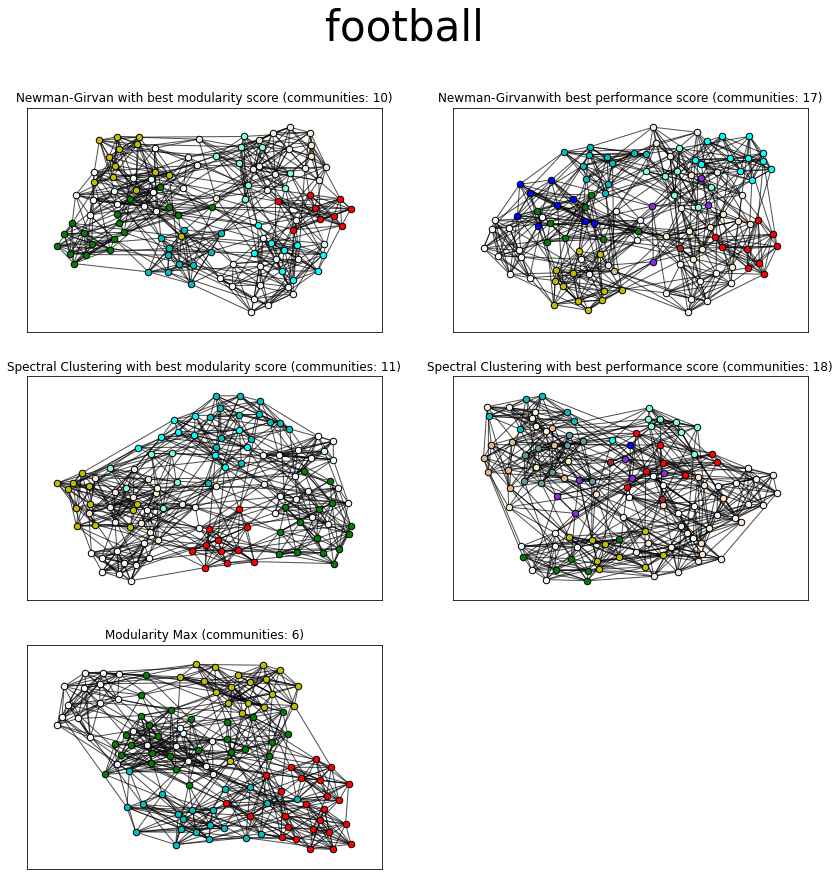

In [193]:
showPlots(football, "football")

<p> Σχολιασμός </p>

Ο συγκεκριμένος γράφος έχει 12 κοινότητες. Αυτό το γνωρίζουμε από [εδώ](http://snap.stanford.edu/agm/?fbclid=IwAR3tBPWGVIXp9ZXuV01NApZfugV7Uz3rpEqpWiNB8ws2LB1Umdj4Orko3lo). Όπως φαίνεται πιο πάνω απο τις οπτικοποιήσεις, κανένας απο τους αλγορίθμους δεν κατάφερε να βρεί όλες τις κοινότητες. Ωστόσο φαίνεται πώς μερικές απο αυτές τις κοινότητες όλοι οι αλγόριθμοι είναι σε θέση να τις εντοπίσουν. Με βάση την οπτικοποίηση, ο χειρότερος φαίνεται να είναι ο Spectral Clustering - performance.

#### Οπτικοποίηση κοινοτήτων Game of Thrones

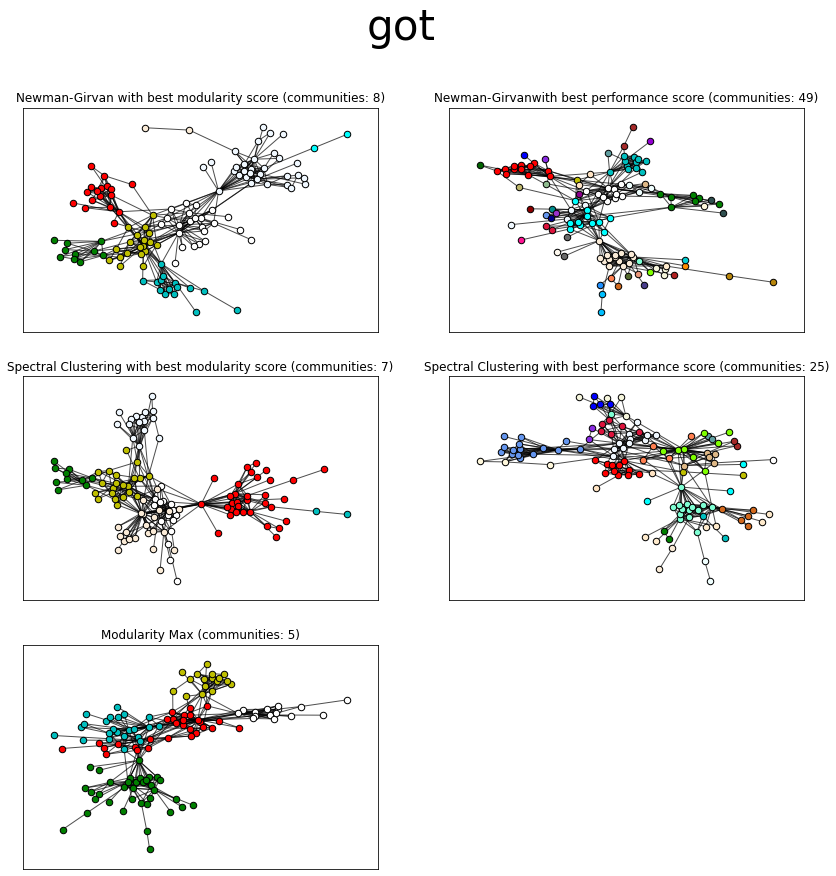

In [195]:
showPlots(got, "got")

<p> Σχολιασμός </p>

Ο γράφος αυτός γνωρίζουμε ότι έχει 6 κοινότητες, κάτι που έχει προαναφερθεί πιο πάνω αλλά φαίνεται και από [εδώ](https://networkofthrones.wordpress.com/the-series/season-5/). Όπως φαίνεται απο τις πιο πάνω οπτικοποιήσεις, κανένας συνδυασμός αλγορίθμου - μετρικής δεν κατάφερε να βρεί και τις 6 κοινότητες. Ωστόσο φαίνεται πως πιο κοντά στις 6 κοινότητες φαίνεται να είναι οι Modularity Max & Spectral Clustering - modularity, που εμφανώς διαχωρίζουν τους κόμβους σε κοινότητες οι οποίες φαίνεται να είναι αποδεκτές (και που μάλιστα μοίαζουν κατα πολύ στις κοινότητες που φαίνονται στην ιστοσελίδα). Επιπλέον, όλοι οι αλγόριθμοι που χρησιμοποιούν την μετρική performance είναι λανθασμένοι καθώς παράγουν υπερβολικά μεγάλο αριθμό κοινοτήτων.

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

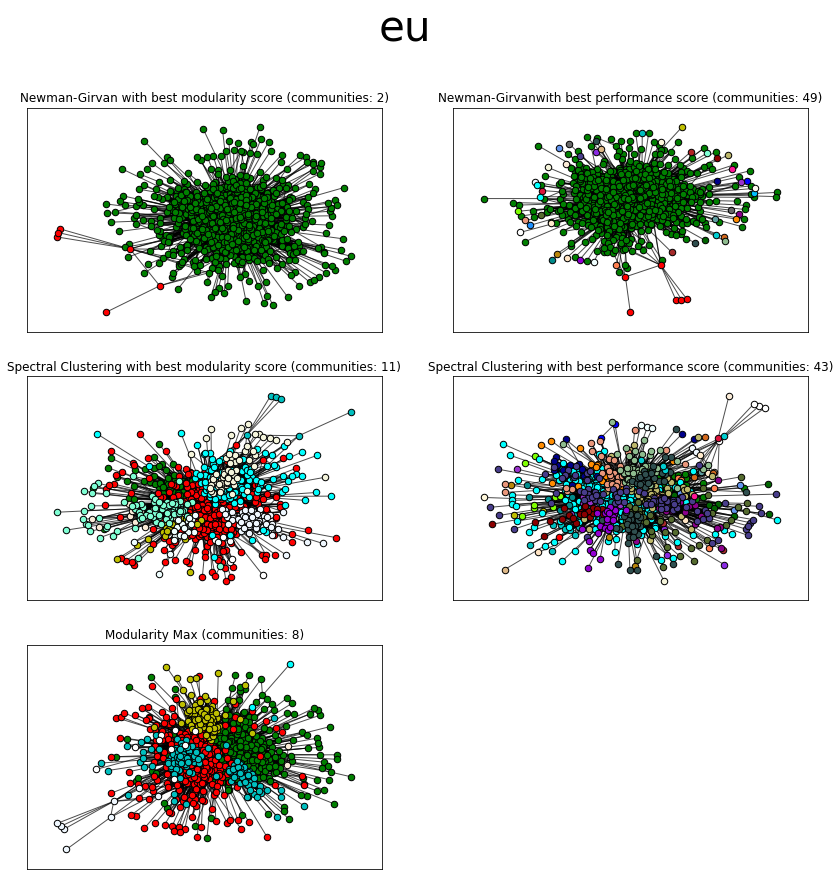

In [196]:
showPlots(eu_subgraph, "eu")

<p> Σχολιασμός </p>

Από την ground truth διαμέριση γνωρίζουμε ότι υπάρχουν 42 κοινότητες για την μεγαλύτερη συνεκτική συνιστώσα του γράφου eu. Ο μόνος συνδυασμός αλγορίθμου - μετρικής που φαίνεται να είναι κοντά σε αυτό το νούμερο είναι ο Spectral Clustering - performance, ο οποίος βρίσκει 43 κοινότητες. Στις πάραπανω οπτικοποιήσεις λόγω του ότι οι κόμβοι είναι όλοι συγκεντρωμένοι στο κέντρο είναι δύσκολο να εξαχθούν κάποια αποτελέσματα και παρατηρήσεις. Πράγματι, αν συγκρίνουμε τις οπτικοποιήσεις του Spectral Clustering - performance, με την οπτικοποίηση του ground truth partition είναι η μόνη περίπτωση που φαίνεται να είναι αρκετά κοντά σαν αποτέλεσμα. Τέλος, ο Girvan Newman - modularity, Spectral Clustering - modularity και ο Modularity Max, φαίνεται να έχουν τα πιο λάθος αποτελέσματα, καθώς επιστρέφουν πολύ λίγες κοινότητες, συγκριτικά με την ground truth διαμέριση.

##### Ground Truth διαμέριση και οπτικοποίηση της

Modularity Score of Ground Truth partition 0.28801318862374214
Performance Score of Ground Truth partition 0.9428136036490563


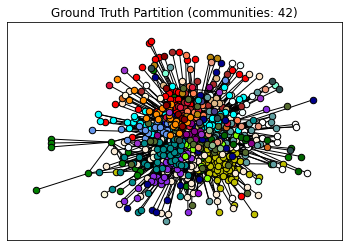

In [197]:
comms = {}

with open("email-Eu-core-department-labels.txt") as file:
    for l in file:
        x = l.split(' ')
        nodeNumber = str(x[0])
        commNumber = str(x[1])
        if (nodeNumber in eu_subgraph.nodes):
            if (commNumber not in comms.keys()):
                comms[commNumber] = []
            comms[commNumber].append(nodeNumber)

ground_truth_mod = nx.algorithms.community.quality.modularity(eu_subgraph, comms.values())
ground_truth_perf = nx.algorithms.community.quality.partition_quality(eu_subgraph, comms.values())[1]

ground_truth = comms.values()

print("Modularity Score of Ground Truth partition", ground_truth_mod)
print("Performance Score of Ground Truth partition", ground_truth_perf)

plt.title('Ground Truth Partition (communities: ' + str(len(ground_truth)) + ')')
pos = nx.fruchterman_reingold_layout(eu_subgraph)
nx.draw_networkx_edges(eu_subgraph, pos = pos)
for (nodes, i) in zip(ground_truth, range(len(ground_truth))):
    n = nx.draw_networkx_nodes(eu_subgraph, pos = pos, node_size = 42, nodelist = nodes, node_color = colors[i])
    n.set_edgecolor("black")

<p> Σύγκριση της Ground Truth διαμέρισης με τα αποτελέσματα των αλγορίθμων </p>

In [206]:
data = []
data.append([modularityList[7], modularityList[15], modularityList[23], ground_truth_mod])
data.append([performanceList[7], performanceList[15], performanceList[23], ground_truth_perf])
pd.DataFrame(data, index = ["Modularity", "Performance"], columns = ["Girvan-Newman", "Spectral Clustering", "Modularity Max", "Ground Truth"])

,Girvan-Newman,Spectral Clustering,Modularity Max,Ground Truth
Modularity,0.000622,0.378423,0.347133,0.288013
Performance,0.137490,0.861202,0.707872,0.942814


<p> Σχολιασμός </p>

* Αρχικά, η ground truth διαμέριση έχει 42 κοινότητες, κάτι που κανένας συνδυασμός αλγορίθμου-μετρικής δεν επιφέρει σαν λύση. Δεν υπάρχει καν κοντινή απάντηση
* Στην μετρική performance φαίνεται ότι κανένας αλγόριθμος δεν επιφέρει τέτοιο αποτέλεσμα. Σε όλους τους αλγορίθμους η τιμή του performance είναι κάτω απο 86 ενώ στην ground truth διαμέριση είναι κοντά στο 95
* Καλύτερο αποτέλεσμα όσο αφορά την μετρική modularity δίνουν οι δύο αλγόριθμοι Spectral Clustering και Modularity Max
* Είναι εμφανές και πάλι ότι ο Girvan Newman δίνει και πάλι τα χειρότερα αποτελέσματα σε σχέση με τους άλλους αλγορίθμους και η αναμονή του χρόνου δεν είναι ωφέλιμη

#### Οπτικοποίηση κοινοτήτων REG

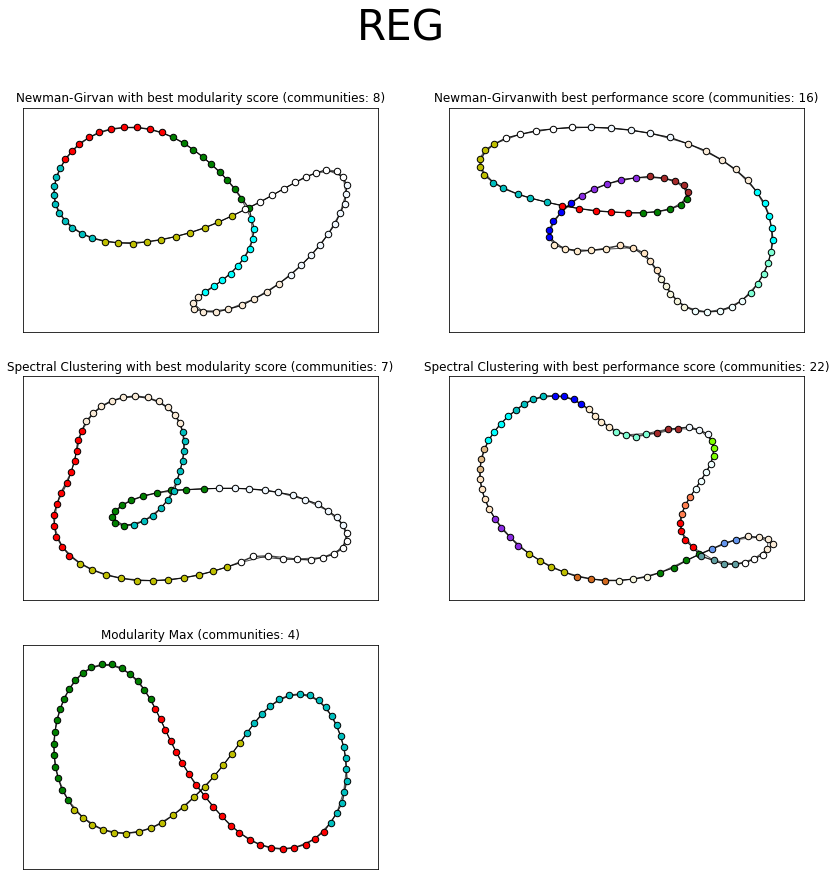

In [198]:
showPlots(REG, "REG")

<p> Σχολιασμός </p>

Στην τοπολογία REG, δεν αναμένουμε κάποιες συγκεκριμένες κοινότητες όπως για παράδειγμα στον REG. Λόγω του ότι οι κόμβοι έχουν τον ίδιο βαθμό και την ίδια διάταξη που έχει ο κάθε κόμβος ως προς κάθε άλλο, αλλά και το πως συνδέονται μεταξύ τους. Έτσι, όπως έχει προαναφερθεί και πιο πάνω στην εργασία, κοινότητες που εμπεριέχουν κόμβους που είναι διαδοχικοί θεωρούνται ορθές και επιφέρουν καλά αποτελέσματα. Απ' όσο φαίνεται απο τα πιο πάνω σχήματα, όλοι οι αλγόριθμοι με τους συνδυασμούς των μετρικών επιστρέφουν κοινότητες με διαδοχικούς κόμβους και γι'αυτό τον λόγο έχουν και καλές τιμές στις μετρικές. Αξίζει να σημειωθεί ότι παρ'όλο που όλοι οι αλγόριθμοι επιστρέφουν κοινότητες με διαδοχικούς κόμβους, σε καμία περίπτωση δεν υπάρχει κοινότητα που να έχει ίσο αριθμό κόμβων με κάποια άλλη.

#### Οπτικοποίηση κοινοτήτων RGER

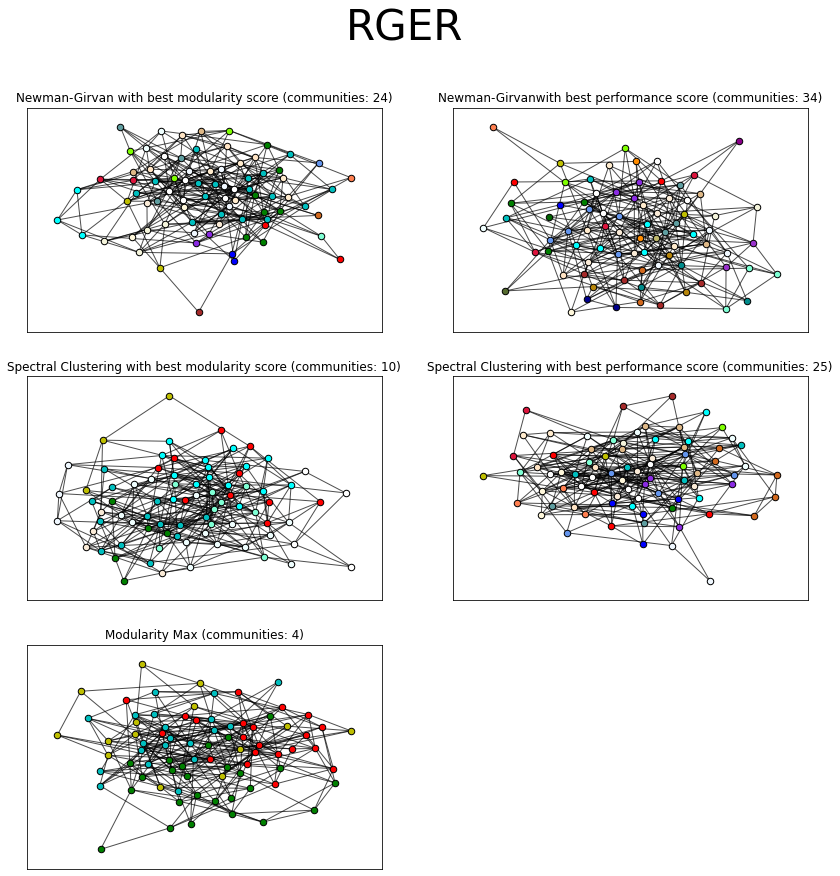

In [199]:
showPlots(RGER, "RGER")

<p> Σχολιασμός </p>

Στην τοπολογία RGER δεν αναμένουμε να σχηματίζονται κοινότητες με κάποιο συγκεκριμένο τρόπο, όπως για παράδειγμα στον RGG. Αυτό οφείλεται στην τυχαιότητα των συνδέσεων των κόμβων, οπότε καθίσταται πολύ δύσκολο να βρεθούν διακριτές κοινότητες στη συγκεκριμένη τοπολογία. Βέβαια, από τις πιο πάνω οπτικοποιήσεις φαίνεται πως η Modularity Maximization μέθοδος βρίσκει κάποιες κοινότητες τις οποίες μπορούμε να διακρίνουμε. Αυτό λογικά οφείλεται στο ότι ο συγκεκριμένος αλγόριθμος είναι greedy, ο οποίος ξεκινά όλους τους κόμβους να ανήκουν σε ξεχωριστή κοινότητα ο καθένας και στη συνέχεια προσπαθεί να τους κατατάξει στην ίδια κοινότητα με παράγοντα να αυξηθεί η μετρική modularity.

#### Οπτικοποίηση κοινοτήτων RGG

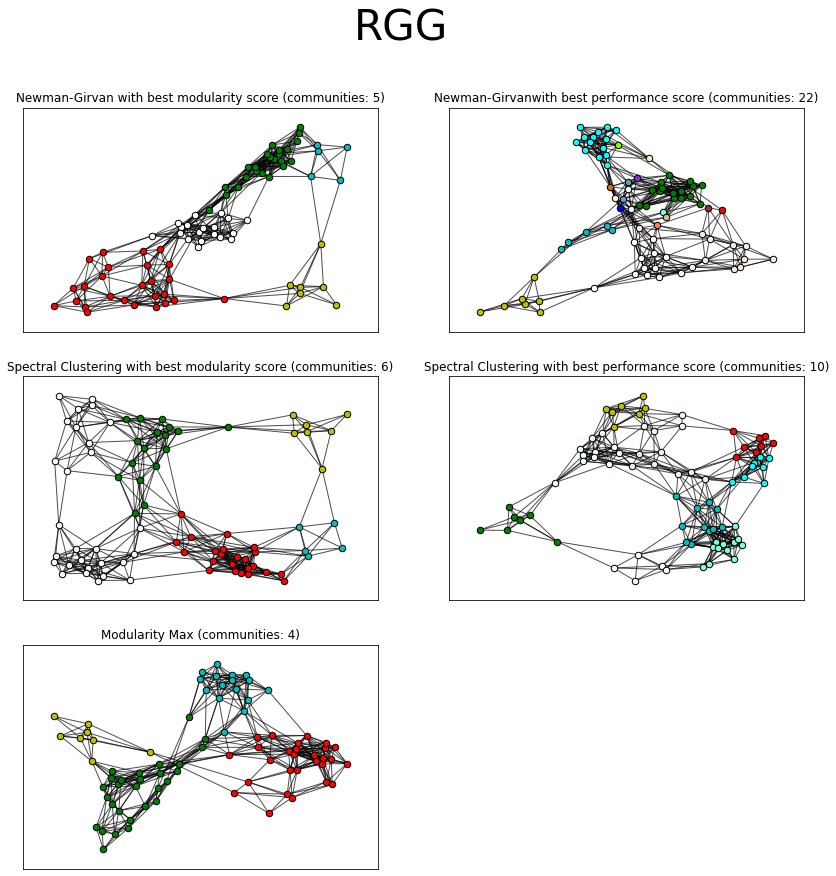

In [200]:
showPlots(RGG, "RGG")

<p> Σχολιασμός </p>

Αρχικά για την συγκεκριμένη τοπολογία αναμένουμε να σχηματίζονται κοινότητες, εφόσον οι κόμβοι συνδέονται μόνο με τους κόμβους που βρίσκονται γύρω τους. Αυτό επαληθεύεται κοιτάζοντας τις οπτικοποιήσεις, όπου φαίνεται ξεκάθαρα πως σχεδόν όλοι οι συνδυασμοί αλγορίθμων-μετρικών (εξαιρουμένου του Girvan Newman - performance) βρίσκουν κοινότητες οι οποίες φαίνονται ορθές. Κάτι άλλο που αξίζει να σημειωθεί είναι πως οι αλγόριθμοι που φαίνεται να λειτουργούν ορθά και επιστρέφουν κοινότητες που αναμέναμε, έχουν κάποιο κοινό παρονομαστή, δηλαδή συμφωνούν σε μερικές εξ αυτών. Από τις οπτικοποιήσεις φαίνεται να λειτουργούν καλύτερα οι Modularity Max & Girvan Newman - modularity.

#### Οπτικοποίηση κοινοτήτων SW

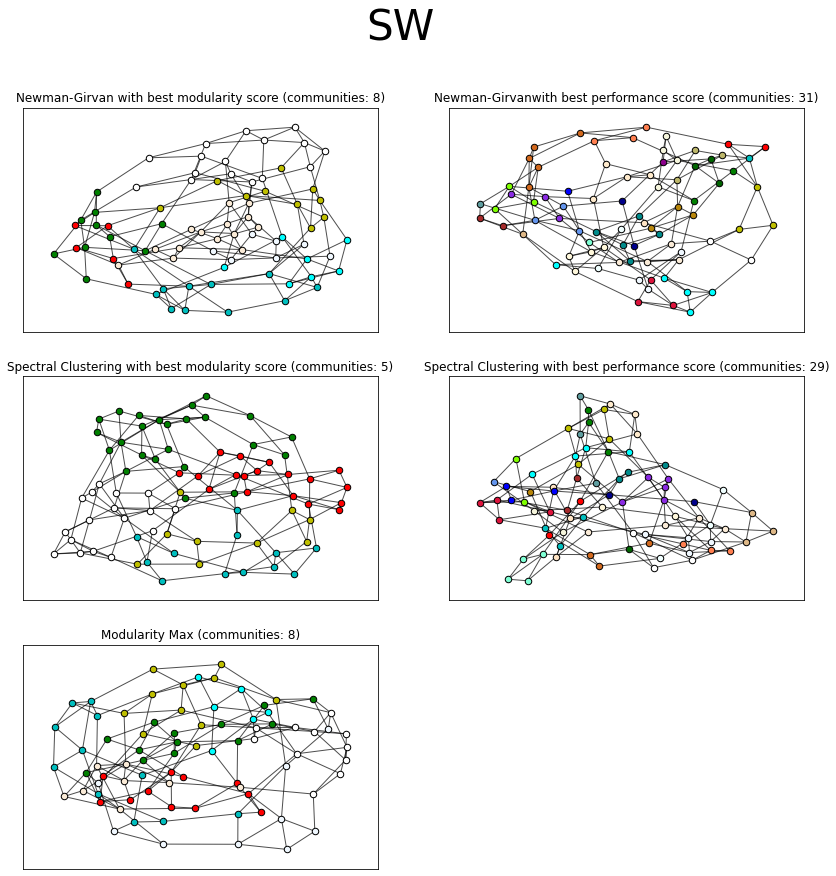

In [201]:
showPlots(SW, "SW")

<p> Σχολιασμός </p>

Στην τοπολογία Small World αναμένουμε να σχηματιστούν κοινότητες γύρω απο κόμβους με μεγάλο degree. Οπτικά αυτό φαίνεται στους αλγορίθμους οι οποίοι δεν βρήκαν τις κοινότητες με βάση το καλύτερο performance.

#### Οπτικοποίηση κοινοτήτων SF

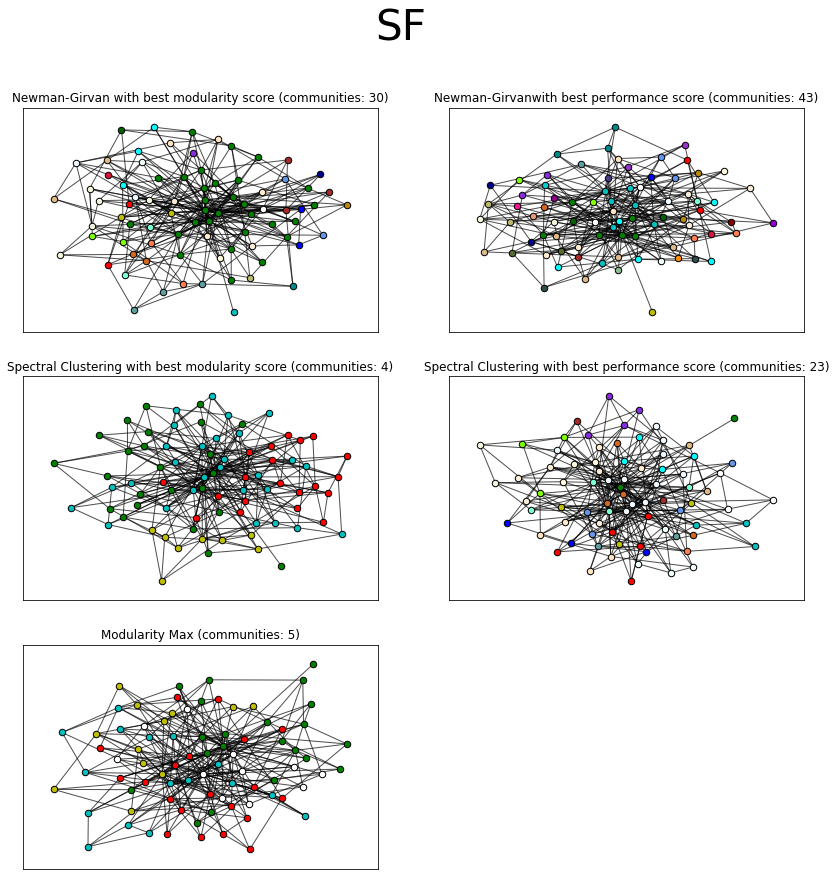

In [202]:
showPlots(SF, "SF")

<p> Σχολιασμός </p>

Στην περίπτωση της τοπολογίας Scale Free αναμένουμε επίσης να δημιουργηθούν κοινότητες γύρω απο κόμβους με μεγάλο degree, όπως και στον Small World. Απο τις οπτικοποιήσεις μπορούμε να πούμε πως οι αλγορίθμοι οι οποίοι χρησιμοποιήσαν την μετρική performance καθώς και ο Girvan Newman - modularity, φαίνεται πως δεν έκαναν και τόσο καλή δουλειά όπως τους υπόλοιπους. Είναι εμφανές επίσης ότι οι Modularity Max & Spectral Clustering - modularity φαίνεται να έχουν εντοπίσει αποδεκτές κοινότητες.